# Decision Tree Classification

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df = dataset.copy()

In [5]:
#Dropping userid column
df = df.drop('User ID',axis=1)

In [6]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
#Converting Male 0 and Female to 1
df['Gender'] = df['Gender'].apply(lambda x: 0 if x=='Male' else 1)

In [8]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [9]:
df1 = df.copy()

In [10]:
y= df1['Purchased']
df1 = df1.drop('Purchased',axis=1)

## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size = 0.2, random_state = 42)

In [12]:
X_train.shape

(320, 3)

In [13]:
X_test.shape

(80, 3)

## Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
cols = ['Age','EstimatedSalary']
sc = StandardScaler()
X_train[cols] = sc.fit_transform(X_train[cols])
X_test[cols] = sc.transform(X_test[cols])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [15]:
X_train.head() #x-mean/std.dev

,Gender,Age,EstimatedSalary
3,1,-1.066752,-0.386344
18,0,0.797535,-1.229939
202,1,0.110692,1.853544
250,1,0.601294,-0.909955
274,1,1.876859,-1.288118


## Training the Decision Tree Classification model on the Training set

In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 100)
#classifier = DecisionTreeClassifier(random_state=100)
clf = classifier.fit(X_train, y_train)

## Predicting the Test set results

In [17]:
y_pred = clf.predict(X_test)

## Making the Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[46  6]
 [ 6 22]]


## Visualising the Training set results

## Visualising the Test set results

In [19]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 0.65
|   |--- feature_2 <= 0.59
|   |   |--- feature_1 <= -0.13
|   |   |   |--- class: 0
|   |   |--- feature_1 >  -0.13
|   |   |   |--- feature_2 <= -0.08
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  -0.08
|   |   |   |   |--- feature_2 <= 0.38
|   |   |   |   |   |--- feature_1 <= 0.36
|   |   |   |   |   |   |--- feature_2 <= 0.01
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_2 >  0.01
|   |   |   |   |   |   |   |--- feature_1 <= 0.26
|   |   |   |   |   |   |   |   |--- feature_2 <= 0.27
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.24
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.06
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  0.06
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- feature_2 >  0.24
|   |   |   |   |   |   |   |   |   |   |--- feature_1 

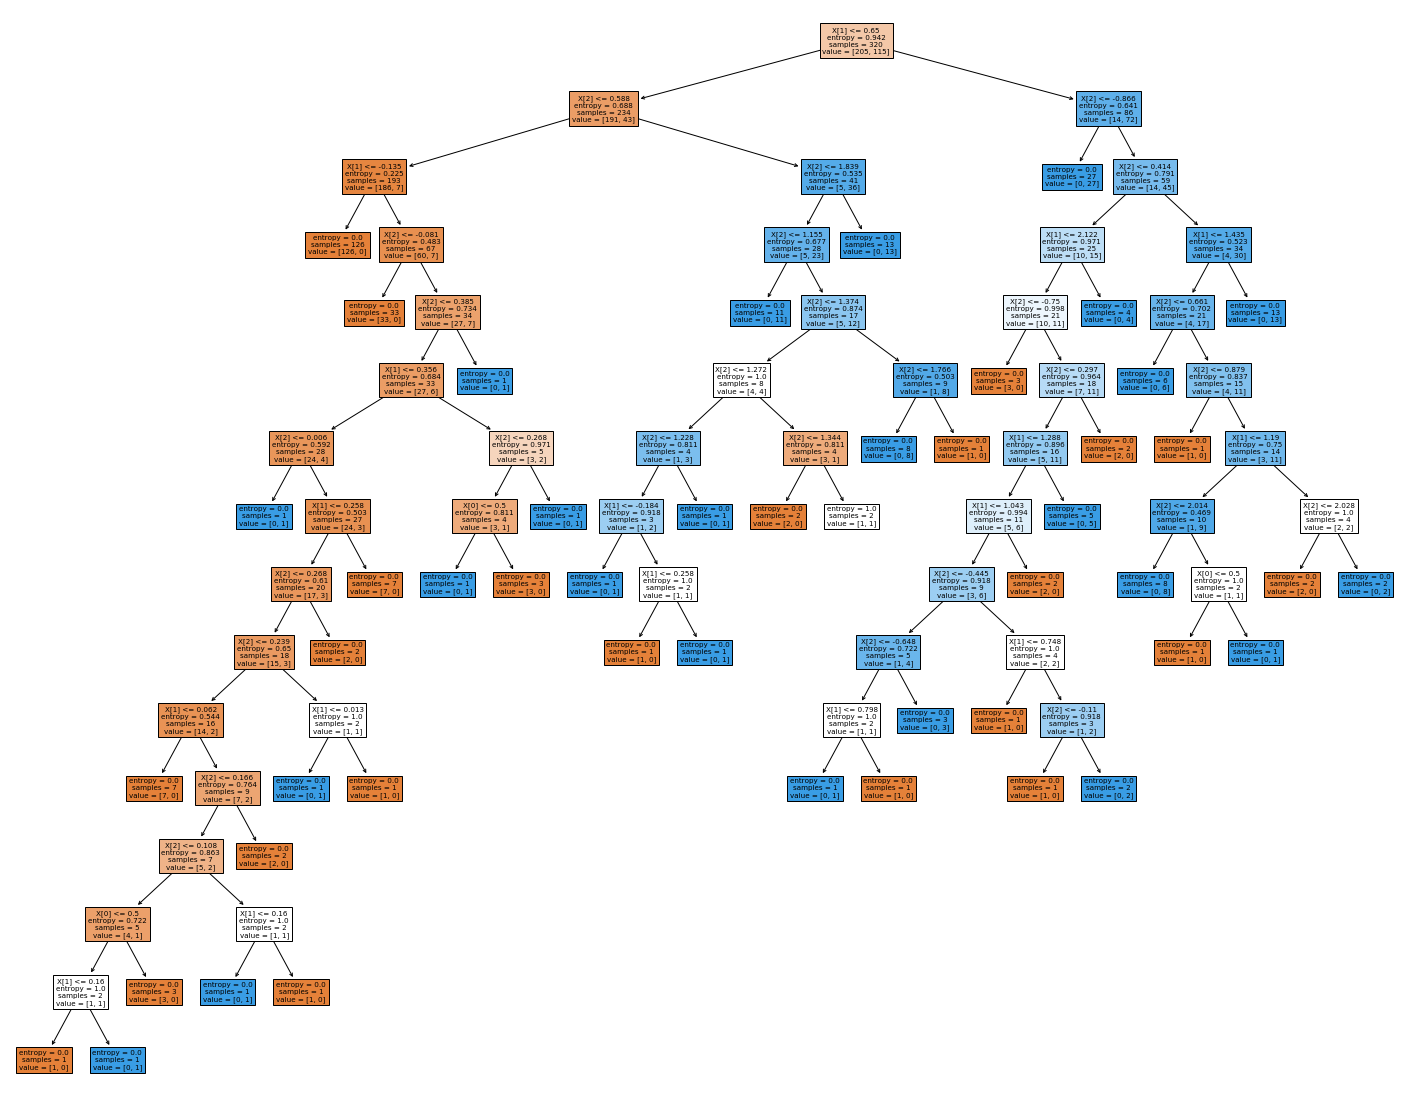

In [20]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, filled=True)

In [21]:
#K fold and cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [22]:
#hyperparameter tuning
param_grid = {
    'min_samples_leaf': [10,20,50], #range(100,50,500)
    'min_samples_split': [10,20,50],
    'criterion': ["entropy", "gini"],
   # 'n_estimators': [100,150,200,250]
}

n_folds = 5

## Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state=100)
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, n_jobs =1)

 ## Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'min_samples_leaf': [10, 20, 50],
                         'min_samples_split': [10, 20, 50]},
             verbose=1)

In [23]:
grid_search.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 10, 'min_samples_split': 10}

In [24]:
clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=10, 
                                    min_samples_split=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [25]:
from sklearn import metrics 
confusion = metrics.confusion_matrix(y_test,y_pred)
print(confusion)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))

[[47  5]
 [ 2 26]]
Accuracy: 0.9125
Recall/Sensitivity: 0.9285714285714286


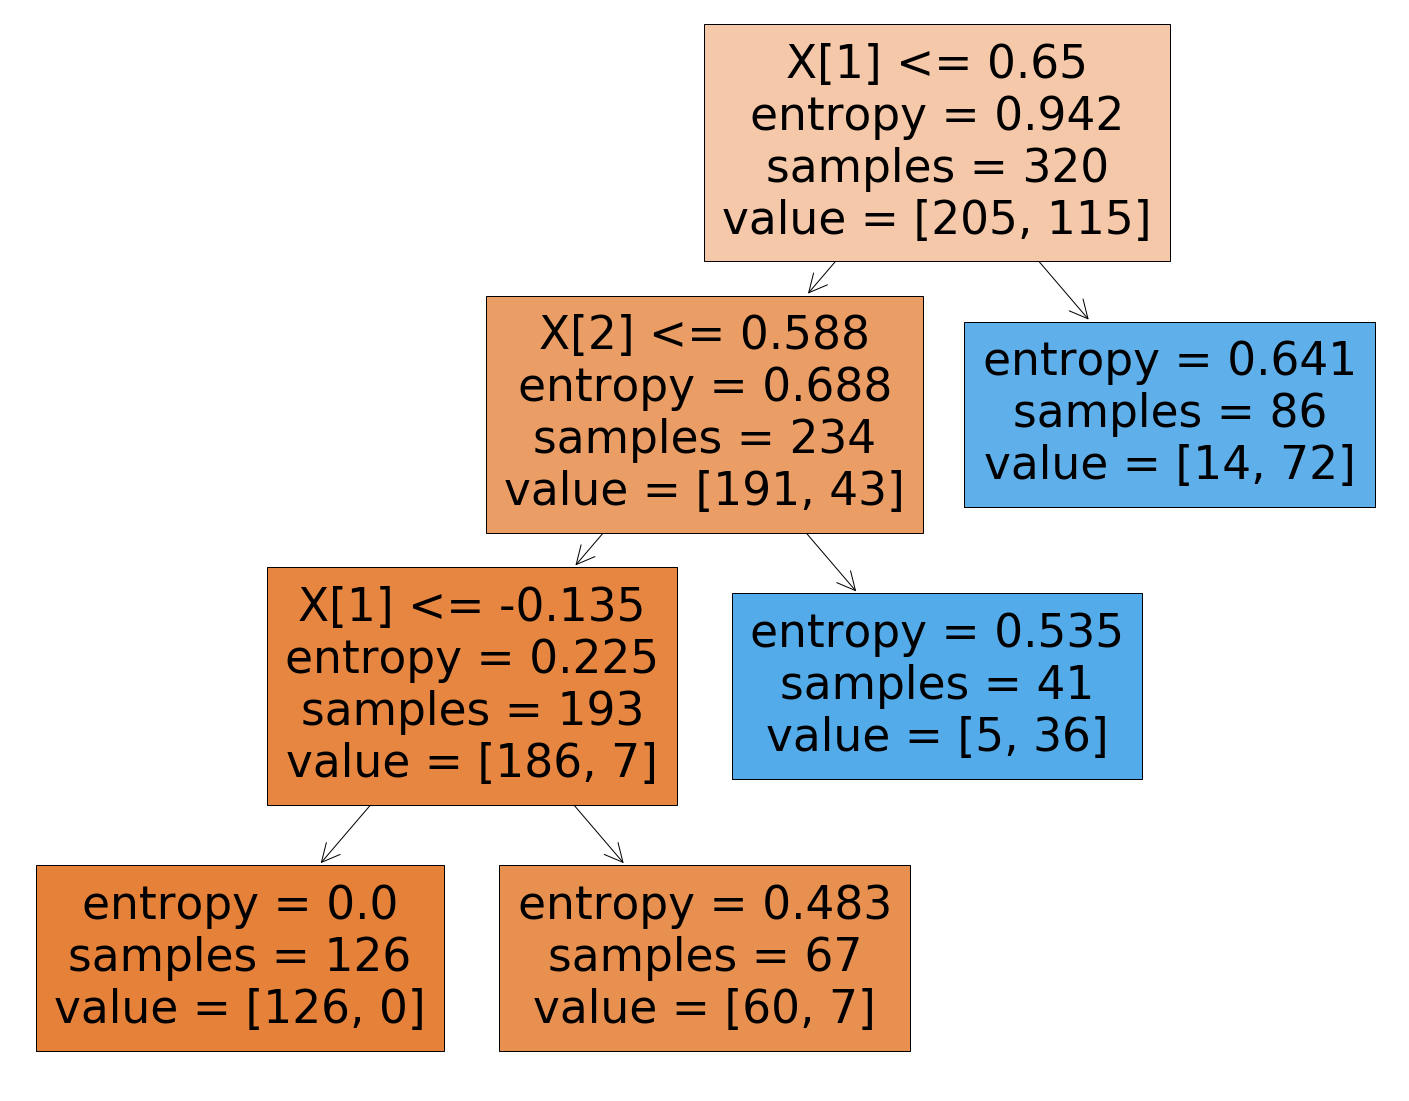

In [26]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, filled=True)

In [28]:
#Randomforest 
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'min_samples_leaf': [10,20,50],
    'min_samples_split': [10,20,50],
    'criterion': ["entropy", "gini"],
    'n_estimators': [50,100]
}

n_folds = 5

## Instantiate the grid search model
randtree = RandomForestClassifier(random_state=100)
grid_search = GridSearchCV(estimator = randtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, n_jobs =1)

 ## Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   10.4s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100), n_jobs=1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'min_samples_leaf': [10, 20, 50],
                         'min_samples_split': [10, 20, 50],
                         'n_estimators': [50, 100]},
             verbose=1)

In [29]:
grid_search.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 50}

In [31]:
#Fitting with the best one

rf_clf = RandomForestClassifier(criterion = 'entropy', min_samples_leaf=10, 
                                    min_samples_split=100,n_estimators= 50)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

In [32]:
confusion = metrics.confusion_matrix(y_test,y_pred)
print(confusion)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))

[[47  5]
 [ 2 26]]
Accuracy: 0.9125
Recall/Sensitivity: 0.9285714285714286
